## Question 2: Linear Regression

Lets' start by generating 3 sets of simple data. Matrices A, B and C with dimensions 100 × 2. Initialized with normal
distribution $\mu$ = 2 and $\sigma$ = 0.01, 0.1 and 1

In [2]:
import numpy as np

A = np.random.normal(loc=2.0, scale=0.01, size=(100, 2))
B = np.random.normal(loc=2.0, scale=0.1, size=(100, 2))
C = np.random.normal(loc=2.0, scale=1.0, size=(100, 2))

### Implementation of the ”Learn Simple Linear Regression” algorithm
Very straight forward, just follow the algorithm of the assignment.

In [3]:
def simple_linear_regression(data):
    data = np.array(data)
    x = data[:, 0]
    y = data[:, 1]

    x_mean = np.mean(x)
    y_mean = np.mean(y)

    numerator = np.sum((x - x_mean) * (y - y_mean))
    denominator = np.sum((x - x_mean) ** 2)

    b_1 = numerator / denominator
    b_0 = y_mean - b_1 * x_mean

    return b_0, b_1

Train on matrix A to learn values of $\beta_0$ and $\beta_1$.

In [4]:
b_0, b_1 = simple_linear_regression(A)

print(f'b_0: {b_0:.2f}, b_1: {b_1:.2f}')

b_0: 1.67, b_1: 0.16


### Implementation of the ”Predict using Simple Linear Regression” algorithm
Even more straight forward, just one multiplication and addition, like on the assignment.

In [5]:
def predict(x, b_0, b_1):
    return b_0 + b_1 * x

Calculate the points fore each training example in A.

In [6]:
xs = A[:, 0]

predicted_ys = predict(xs, b_0, b_1)

Now, we plot the training points from matrix A and the predicted values in the form of line graph.

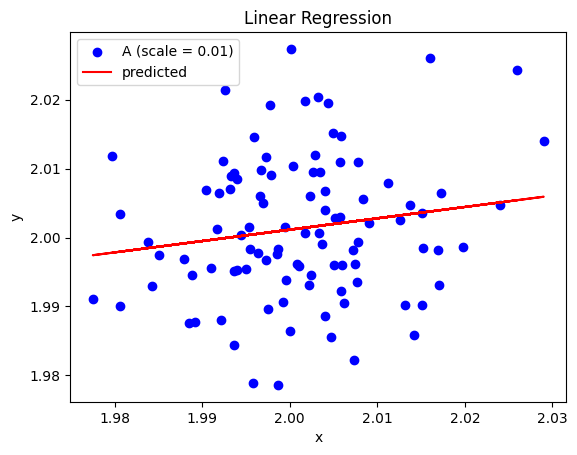

In [7]:
import matplotlib.pyplot as plt

plt.scatter(A[:, 0], A[:, 1], color='blue', label='A (scale = 0.01)')
plt.plot(A[:, 0], predicted_ys, color='red', label='predicted')

plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Linear Regression')
plt.show()
plt.close()

Plot the linear regression for the other matrices

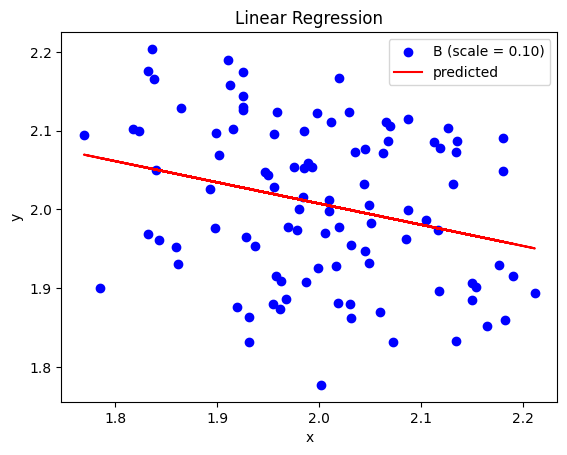

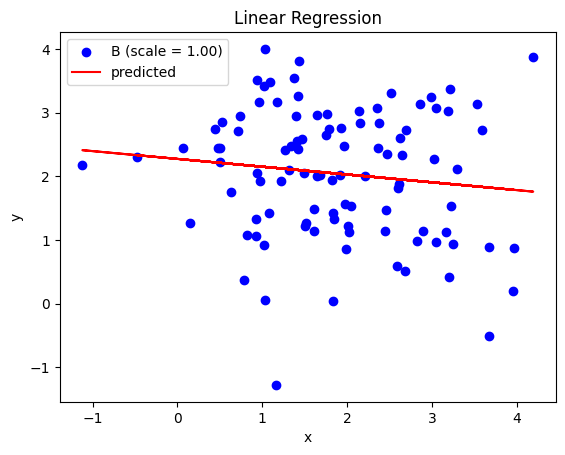

In [8]:
def plot_linear_regression(scale, b_0_is_zero, b_1_is_zero, title):
    M = np.random.normal(loc=2.0, scale=scale, size=(100, 2))
    b_0, b_1 = simple_linear_regression(M)
    if b_0_is_zero:
        b_0 = 0.0
    if b_1_is_zero:
        b_1 = 0.0
    predicted_ys = predict(M[:, 0], b_0, b_1)
    plt.scatter(M[:, 0], M[:, 1], color='blue', label=f'B (scale = {scale:.2f})')
    plt.plot(M[:, 0], predicted_ys, color='red', label='predicted')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.title(title)
    plt.show()
    plt.close()


plot_linear_regression(0.1, b_0_is_zero=False, b_1_is_zero=False, title='Linear Regression')
plot_linear_regression(1, b_0_is_zero=False, b_1_is_zero=False, title='Linear Regression')

### My comment on the effect that $\sigma$ has on the line that is predicted.
With a small $\sigma$, the points closely fit to the predicted line. As $\sigma$ increases, the points spread out more, which adds more noise. This noise influences the y intercept and the slope of the line.
If we increased the sample size, the predicted line would become more stable and converge toward the true trend. This would work even with large $\sigma$, more data helps bring the line closer to the true average relationship around y = 2.

Now, we put b_0 to zero and generate the predicted line

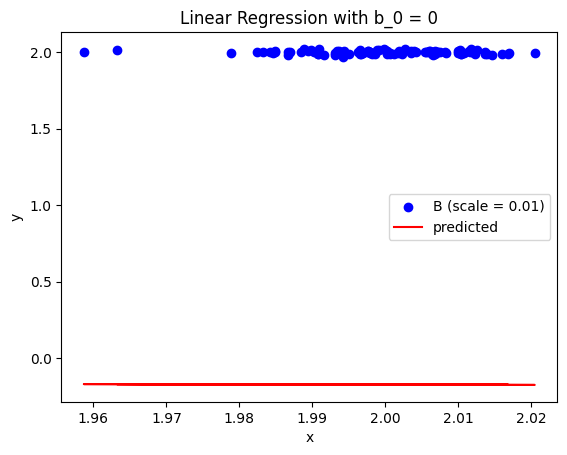

In [9]:
plot_linear_regression(0.01, b_0_is_zero=True, b_1_is_zero=False, title='Linear Regression with b_0 = 0')

### My comment for $\beta_0$ = 0
Now, that $\beta_0$ = 0, we have no y intercept. Therefore, everything said earlier is true, except this time it converges toward y = 0 as the sample size increases, regardless of the value of $\sigma$.

Now, we put $\beta_1$ to zero and generate the predicted line

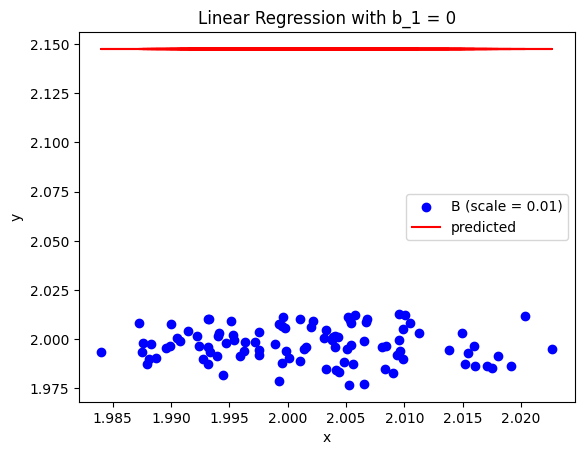

In [10]:
plot_linear_regression(0.01, b_0_is_zero=False, b_1_is_zero=True, title='Linear Regression with b_1 = 0')

### My comment for $\beta_1$ = 0
Now, that $\beta_1$ = 0, we have no slope. Therefore, the predicted line is just a horizontal line at y = $\beta_0$. For any value of $\sigma$, the line remains constant. The line will be closer to y = 2 as $\sigma$ gets closer to 0, or we increase the sample size.

Replacement with `numpy.linalg.lstsq`. According, to the documentation, this "computes the vector x that approximately solves the equation a @ x = b", therefore respectively y = \[1,x]\[b_0, b_1]^T

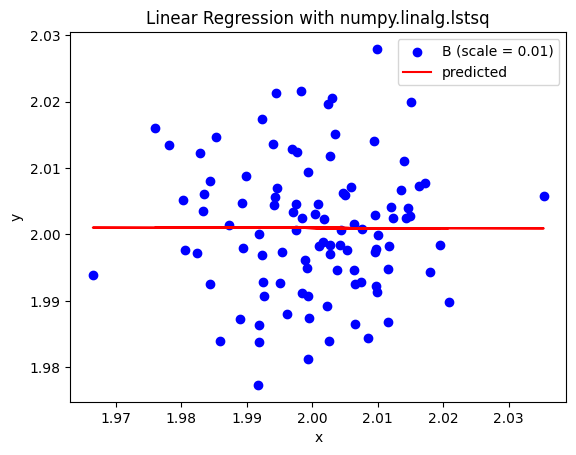

In [11]:
def plot_regression_numpy(scale, title):
    M = np.random.normal(loc=2.0, scale=scale, size=(100, 2))

    xs = M[:, 0]
    ys = M[:, 1]

    X = np.vstack([np.ones(len(xs)), xs]).T

    b, _, _, _ = np.linalg.lstsq(X, ys)

    b_0, b_1 = b[0], b[1]

    predicted_ys = predict(M[:, 0], b_0, b_1)
    plt.scatter(M[:, 0], M[:, 1], color='blue', label=f'B (scale = {scale:.2f})')
    plt.plot(M[:, 0], predicted_ys, color='red', label='predicted')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.title(title)
    plt.show()
    plt.close()


plot_regression_numpy(0.01, title='Linear Regression with numpy.linalg.lstsq')

Replacement with `sklearn.linear_model.LinearRegression`

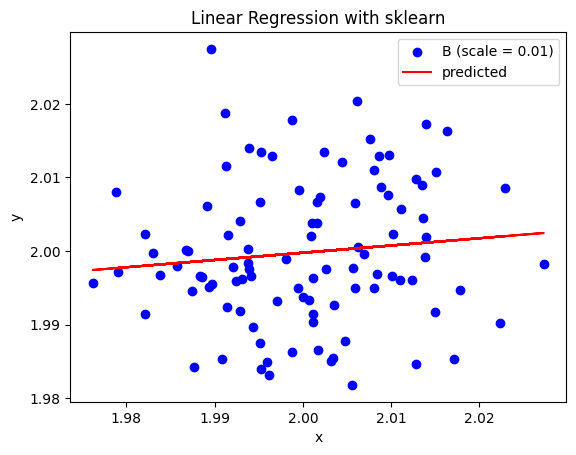

In [12]:
from sklearn.linear_model import LinearRegression


def plot_regression_sklearn(scale, title):
    M = np.random.normal(loc=2.0, scale=scale, size=(100, 2))

    x = M[:, 0].reshape(-1, 1)
    y = M[:, 1]

    model = LinearRegression()

    model.fit(x, y)

    b_0 = model.intercept_
    b_1 = model.coef_[0]

    predicted_ys = predict(M[:, 0], b_0, b_1)
    plt.scatter(M[:, 0], M[:, 1], color='blue', label=f'B (scale = {scale:.2f})')
    plt.plot(M[:, 0], predicted_ys, color='red', label='predicted')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.title(title)
    plt.show()
    plt.close()


plot_regression_sklearn(0.01, title='Linear Regression with sklearn')

### My comment and comparison between the differences
For sklearn and numpy, the results are basically identical. They both use the linear regression algorithm to find the best-fit line, but the way they handle inputs and the overall process are different.
With numpy, the input is a simple matrix X with a column of ones for the intercept and the y values, which means we need to carefully set up the matrix format. In contrast, sklearn.LinearRegression takes x and y directly and automatically manages the fitting, including intercept handling, making it easier to use.
